# Chương 05. Extracting Features from an Image

- Trong chương này, chúng ta sẽ tìm hiểu làm thế nào để **phát hiện các điểm nổi bật (`detect keypoints`)**, còn được gọi là các điểm chính (keypoints) trong một hình ảnh.
- Chúng ta sẽ thảo luận tại sao các điểm quan trọng(keypoints) và làm thế nào chúng ta có thể sử dụng chúng để hiểu nội dung hình ảnh. 
- Chúng ta sẽ nói về các kỹ thuật khác nhau có thể được sử dụng để phát hiện các điểm chính này và hiểu cách chúng ta có thể trích xuất các đặc trưng từ một hình ảnh nhất định.

## Đến cuối chương, bạn sẽ biết được:
    + Điểm chính (keypoint) là gì và tại sao chúng ta quan tâm đến chúng?
    + Cách phát hiện điểm chính (How to detect keypoints).
    + Cách sử dụng các điểm chính (keypoints) để phân tích nội dung hình ảnh.
    + Các kỹ thuật khác nhau để phát hiện các điểm chính
    + Làm thế nào để xây dựng một bộ trích xuất đặc trưng (feature extractor).

## Nội dung:
1. **Why do we care about keypoints ?**
2. **What are keypoints ?**
3. **Detecting the corners**
4. **Good feature to track**
5. **Scale-invarriant feature transform (SIFT)**
6. **Speed-up robust feature (SURF)**
7. **Feature from accelerated segment test (FAST)**
8. **Binary robust independent elementary features (BRIEF)**
9. **Oriented FAST and Rotated BRIEF (ORB)**

----

## 1. Why do we care about keypoints ?

- Phân tích nội dung hình ảnh đề cập đến quá trình hiểu nội dung của hình ảnh để chúng ta có thể thực hiện một số thao tác dựa trên việc hiểu đó. 
- Bộ não của chúng ta là một cỗ máy cực kỳ mạnh mẽ có thể làm những việc phức tạp rất nhanh. Khi chúng ta nhìn vào một cái gì đó, bộ não của chúng ta sẽ tự động tạo ra một dấu ấn (để ghi nhớ) dựa trên các đặc điểm thú vị (interesting features) của hình ảnh đó.

- Hiện tại, một khía cạnh thú vị hay điểm thú vị, điểm nổi bậc là một cái gì đó khác biệt trong khu vực đó. Nếu chúng ta gọi một điểm thú vị, thì không nên có một điểm khác trong vùng lân cận thỏa mãn các ràng buộc. Hãy xem xét hình ảnh sau đây:

- Bây giờ, hãy nhắm mắt lại và cố gắng hình dung hình ảnh này.
- Bạn có thấy một cái gì đó cụ thể? Bạn có thể nhớ lại những gì ở nửa bên trái của hình ảnh? 
- Không hẳn vậy ! Lý do cho điều này là hình ảnh không có bất kỳ thông tin thú vị hay nổi bậc nào. Khi bộ não của chúng ta nhìn vào một cái gì đó như thế này, không có gì để ghi chú, vì vậy nó có xu hướng đi lang thang xung quanh! Chúng ta hãy xem hình ảnh sau đây:

- Bây giờ, hãy nhắm mắt lại và cố gắng hình dung hình ảnh này. Bạn sẽ thấy hồi ức thật sống động và bạn nhớ rất nhiều chi tiết về hình ảnh này. 
- Lý do bạn nhớ nhiều là có rất nhiều khu vực thú vị, khu vực nổi bậc (intersting regions) trong hình ảnh. 
- Mắt người nhạy cảm hơn với nội dung tần số cao sau đó là nội dung tần số thấp. Đây là lý do chúng ta có xu hướng nhớ lại hình ảnh con ngựa tốt hơn hình ảnh nền xanh ở trên. Để chứng minh thêm điều này, chúng ta hãy nhìn vào hình ảnh sau đây:

- Nếu bạn chú ý, mắt bạn lập tức nhìn vào điều khiển TV, mặc dù nó không nằm ở trung tâm của hình ảnh. Chúng ta có xu hướng bị hấp dẫn về các khu vực thú vị (intersting regions) trong hình ảnh vì đó là nơi chứa tất cả thông tin. Đây là những gì bộ não của chúng ta cần lưu trữ để nhớ lại nó sau này.

- Khi chúng ta xây dựng các hệ thống nhận dạng đối tượng, chúng ta cần phát hiện các **interesting regions** này để tạo **signature** cho hình ảnh. Những khu vực thú vị(interesting regions) được đặc trưng bởi các điểm quan trọng (keypoints). 
- **Đây là lý do tại sao phát hiện keypoint rất quan trọng trong nhiều hệ thống thị giác máy tính hiện đại**.

## 2. What are keypoints?

- Bây giờ chúng ta biết rằng các **keypoints** **ám chỉ đến các interesting regions** trong hình ảnh, hãy tìm hiểu sâu hơn một chút.
- Điều gì tạo nên keypoints? Những điểm này ở đâu? Khi chúng ta nói interesting, điều đó có nghĩa là một cái gì đó đang xảy ra trong khu vực đó. Nếu khu vực này đều sem sem như nhau, thì nó không interesting lắm.
- Ví dụ, các giao điểm rất nổi bậc vì có sự thay đổi mạnh về cường độ theo hai hướng khác nhau. Mỗi giao điểm là một điểm duy nhất mà hai đường gặp nhau.
- Nếu bạn nhìn vào những hình ảnh trước trên, bạn sẽ thấy rằng các khu vực nổi bậc không hoàn toàn được tạo thành từ nội dung nổi bậc. Nếu bạn nhìn kỹ, chúng ta vẫn có thể thấy các vùng đơn giản trong các vùng phức tạp. Ví dụ, hãy xem xét hình ảnh sau đây:

- Nếu bạn nhìn vào các đối tượng trên, các phần bên trong của các khu vực thu hút là không thu hút:

- Vì vậy, nếu chúng ta mô tả đặc điểm của đối tượng này, chúng ta sẽ cần đảm bảo rằng chúng ta đã chọn được những điểm thu hút (interesting points). 
- Bây giờ, **làm thế nào để chúng ta xác định điểm quan trọng?** Chúng ta có thể nói rằng bất cứ điều gì không thú vị có thể là một điểm thú vị không? Hãy xem xét ví dụ sau:

- Bây giờ, chúng ta có thể thấy rằng có rất nhiều nội dung tần số cao trong hình ảnh này dọc theo cạnh. Nhưng chúng ta không thể cho rằng toàn bộ cạnh là nổi bậc. 
- Điều quan trọng là phải hiểu rằng nổi bậc (thu hút) không nhất thiết phải đề cập đến giá trị màu sắc hoặc cường độ. Nó có thể là bất cứ điều gì, miễn là nó khác biệt. Các điểm dọc theo rìa không phải là duy nhất đối với hàng xóm của nó. Vì vậy, bây giờ chúng ta biết những gì chúng ta đang tìm kiếm, làm thế nào để chúng ta chọn một điểm nổi bậc?

- Còn góc bàn thì sao? Điều đó khá nổi bậc phải không? Nó là duy nhất đối với các điểm xung quanh và chúng ta không có bất cứ thứ gì như vậy ở khu vực lân cận. Bây giờ điểm này có thể được chọn là một trong những điểm chính (keypoint) của chúng ta. Chúng ta lấy một loạt các điểm chính này để mô tả một hình ảnh cụ thể.

- Khi chúng ta phân tích hình ảnh, chúng ta cần chuyển đổi hình ảnh thành dạng số trước khi chúng ta thao tác. Các điểm chính (keypoints) này được biểu diễn bằng hình thức số và kết hợp các điểm chính này sau đó được sử dụng để tạo image signature. Chúng ta muốn image signature này đại diện cho một hình ảnh nhất định theo cách tốt nhất có thể.

## 3. Detecting the corners (Phát hiện giao điểm)

- Vì chúng ta biết rằng các góc (cornets) rất nổi bậc (interesting), hãy xem cách chúng ta có thể phát hiện ra chúng.
- Trong thị giác máy tính, có một kỹ thuật phát hiện giao điểm (detecting corner) phổ biến được gọi là Haris Corner detector.
- Về cơ bản, chúng ta xây dựng một ma trận 2x2 dựa trên các đạo hàm riêng của ảnh thang độ xám, sau đó phân tích các giá trị riêng thu được. 
- **Eigenvalues** là một tập hợp vô hướng đặc biệt được liên kết với một hệ phương trình tuyến tính cung cấp thông tin được **phân đoạn(segment)** về hình ảnh bởi một cụm các pixel phụ thuộc về nhau.
- Đây thực sự là một sự đơn giản hóa của thuật toán thực tế, nhưng nó chứa được ý tưởng ban đầu. Vì vậy, nếu bạn muốn hiểu các chi tiết toán học cơ bản, bạn có thể xem bài báo gốc của Harris và Stephens tại: http://www.bmva.org/bmvc/1988/avc-88-023.pdf
- Điểm giao nhau (corner point) là một điểm mà cả hai giá trị riêng sẽ có giá trị lớn.

- Nếu bạn run Haris Corner Detector với input là hình trên, bạn sẽ thấy một cái gì đó như thế này:

- Như bạn có thể thấy, tất cả các chấm đen tương ứng với các góc trong ảnh. Bạn có thể nhận thấy rằng các góc ở dưới cùng của hộp không được phát hiện. Lý do cho điều này là các góc không đủ sắc nét. Bạn có thể điều chỉnh các ngưỡng trong corner Detector xác định các góc này. Code sau đây tạo ra các chấm đen trong hình trên:

In [1]:
import cv2
import numpy as np

img = cv2.imread('box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# To detect only sharp corners
dst = cv2.cornerHarris(gray, blockSize=4, ksize=5, k=0.04)
# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01*dst.max()] = [0,0,0]
cv2.imshow('Harris Corners(only sharp)',img)

# to detect soft corners
dst = cv2.cornerHarris(gray, blockSize=14, ksize=5, k=0.04)
dst = cv2.dilate(dst, None)

img[dst > 0.01*dst.max()] = [0,0,0]
cv2.imshow('Harris Corners(also soft)',img)
cv2.waitKey()
cv2.destroyAllWindows()

## 4. Good features to track

- Haris corner detector hoạt động tốt trong nhiều trường hợp, nhưng nó vẫn bỏ sót một vài điều.
- Khoảng sáu năm sau bài báo gốc của Harris và Stephens, Shi và Tomasi đã đưa ra một corner detector tốt hơn. Bạn có thể đọc bài báo gốc tại: http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf
- J. Shi và C.Tomasi đã sử dụng chức năng chấm điểm khác nhau để cải thiện chất lượng tổng thể. Sử dụng phương pháp này, chúng ta có thể tìm thấy N giao điểm là ứng viên có điểm cao nhất trong ảnh đã cho. Điều này rất hữu ích khi chúng ta không muốn sử dụng mọi góc để trích xuất thông tin từ hình ảnh.

- Nếu bạn áp dụng Shi-Tomasi Corner Detector cho hình ảnh cái hợp trước đó, bạn sẽ thấy một cái gì đó sem sem như này:

- Bên dưới là đoạn code thực hiện:

In [ ]:
import cv2
import numpy as np

img = cv2.imread('box.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=20, qualityLevel=0.05, minDistance=25)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    cv2.circle(img, (x,y), 5, 255, -1)

cv2.imshow(f"Top {k} features", img)
cv2.waitKey()

## 5. Scale-invariant feature transform (SIFT) - Chuyển đổi đặc trưng với tỉ lệ không đổi

- Mặc dù giao điểm  là đặc trưng bổi bậc, nhưng chúng **không đủ tốt** để **mô tả** các **phần thực sự nổi bậc**. Khi chúng ta nói về việc phân tích nội dung hình ảnh, chúng ta muốn image signature là không đổi đối với những thứ như tỷ lệ, xoay và chiếu sáng.
- Con người rất giỏi trong những điều này. Ngay cả khi tôi cho bạn xem hình ảnh một quả táo lộn ngược, bị mờ đi, bạn vẫn sẽ nhận ra nó. Nếu tôi cho bạn thấy một phiên bản thực sự phóng to của hình ảnh đó, bạn vẫn sẽ nhận ra nó. Chúng ta muốn các hệ thống nhận dạng hình ảnh của chúng ta có thể làm như vậy.

- Hãy xem xét các đặc trưng góc. Nếu bạn phóng to hình ảnh, một góc có thể biến thành là một góc khác, như sau:

- Trong trường hợp thứ hai, detector sẽ không nhận góc này.Vì nó đã được chọn trong ảnh gốc, ảnh thứ hai sẽ không khớp với ảnh thứ nhất. Về cơ bản là cùng một hình ảnh, nhưng phương pháp dựa trên các đặc trưng góc sẽ hoàn toàn bỏ sót nó.
- Điều này có nghĩa là một corner detector chính xác thì phải có tỉ lệ bảo toàn. Đây là lý do tại sao chúng ta cần một phương pháp tốt hơn để mô tả hình ảnh.

- **SIFT** là một trong những thuật toán phổ biến nhất trong toàn bộ lĩnh vực thị giác máy tính. Bạn có thể đọc bài viết gốc của **David Lowe** tại: https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
- Chúng ta có thể sử dụng thuật toán này để trích xuất các keypoints và xây dựng các mô tả đặc trưng tương ứng. Có rất nhiều tài liệu khá oke có sẵn trực tuyến, vì vậy chúng ta không bàn sâu vào vấn đề này.
- **Để xác định một keypoint tiềm năng, SIFT xây dựng một kim tự tháp bằng cách ghép xuống một hình ảnh và lấy sự khác biệt của Gaussian. Điều này có nghĩa là chúng ta chạy bộ lọc Gaussian ở mỗi cấp độ và lấy sự khác biệt để xây dựng các cấp liên tiếp trong kim tự tháp.**
- Để xem điểm hiện tại có phải là keypoint hay không, hãy nhìn vào các **lân cận cũng như các pixel ở cùng một vị trí ở các mức lân cận của kim tự tháp**. **Nếu đó là mức tối đa, thì điểm hiện tại được chọn làm điểm chính**. Điều này đảm bảo rằng chúng ta **giữ cho các điểm chính không thay đổi tỷ lệ**.

- Bây giờ chúng ta đã biết làm thế nào **SIFT** đạt được tỉ lệ không đổi, hãy xem cách nó đạt được tính **xoay vòng bảo toàn**.
- Khi chúng ta xác định các điểm chính (keypoints), mỗi điểm chính được chỉ định một hướng. Chúng ta lấy vùng lân cận xung quanh từng keypoint và tính toán độ lớn và hướng của độ dốc. 
- Điều này cho chúng ta cảm giác về hướng của điểm chính đó. Nếu chúng ta có thông tin này, chúng ta sẽ có thể so khớp điểm chính này với cùng một điểm trong một hình ảnh khác ngay cả khi nó được xoay. Vì chúng ta biết định hướng, chúng ta sẽ có thể **normalize** các keypoints đó trước khi thực hiện so sánh.

- Một khi chúng ta có tất cả thông tin này, làm thế nào để chúng ta định lượng nó?
- Chúng ta cần chuyển đổi nó thành một tập hợp các số để chúng ta có thể thực hiện một số loại phối hợp trên nó. Để đạt được điều này, chúng ta chỉ cần lấy vùng lân cận 16x16 xung quanh mỗi keypoint và chia nó thành 16 khối có kích thước 4 x 4. Đối với mỗi khối, chúng ta tính toán **orientation histogram** với 8 bin.
- Vì vậy, chúng ta có một vectơ có độ dài là 8 được liên kết với mỗi khối, có nghĩa là vùng lân cận được biểu thị bằng một vectơ có kích thước 128 (8x16).
- **Đây là mô tả keypoint cuối cùng sẽ được sử dụng. Nếu chúng ta trích xuất N điểm chính từ một hình ảnh, thì chúng ta sẽ có N mô tả mỗi chiều dài 128. Mảng mô tả N này đặc trưng cho hình ảnh đã cho.**

- Xét hình dưới đây:

- Nếu bạn trích xuất các vị trí các keypoint bằng SIFT, bạn sẽ thấy một cái gì đó sem sem bên dưới, **trong đó kích thước của vòng tròn biểu thị cường độ của các điểm chính và đường bên trong vòng tròn biểu thị hướng**:

- Trước khi chúng ta tới phần code, có một điều cần lưu ý là** SIFT được cấp bằng sáng chế** và **nó không có sẵn miễn phí cho sử dụng thương mại**.

In [ ]:
import cv2
import numpy as np

input_image = cv2.imread('fishing_house.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)


# For version opencv < 3.0.0, use cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray_image, None)

cv2.drawKeypoints(input_image, keypoints, input_image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT features', input_image)
cv2.waitKey()

- Chúng ta cũng có thể tính toán các mô tả. OpenCV cho phép chúng ta làm điều đó một cách riêng biệt hoặc chúng tôi có thể kết hợp các phần phát hiện và tính toán trong cùng một bước bằng cách sử dụng như sau:

In [ ]:
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

## 6. Speeded-up robust features (SURF)

- Mặc dù SIFT rất hay và hữu ích, nhưng nó tính toán chuyên sâu. Điều này có nghĩa là nó chậm và chúng ta sẽ gặp khó khăn khi triển khai hệ thống thực thi với thời gian thực (real-time) nếu sử dụng SIFT.
- Chúng ta cần hệ thống nhanh và có tất cả các lợi thế của SIFT. Nếu bạn còn nhớ, SIFT sử dụng sự khác biệt Gaussian để xây dựng pyramid và quá trình này diễn ra chậm. 
- Vì vậy, để khắc phục điều này, SURF sử dụng bộ lọc hộp đơn giản để xấp xỉ Gaussian. Điều này thực sự dễ dàng để tính toán và nó khá nhanh. 
- Có rất nhiều tài liệu có sẵn trực tuyến trên SURF tại [đây](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html?highlight=surf)
- Bạn cũng có thể tham khảo bài báo gốc tại: http://www.vision.ee.ethz.ch/~surf/eccv06.pdf
- **Chú ý**: **SURF** cũng được cấp bằng sáng chế và nó không được cung cấp miễn phí cho mục đích thương mại.

- Nếu bạn chạy chương trình với SIFT trên hình ảnh trước đó, bạn sẽ thấy ouput như sau:

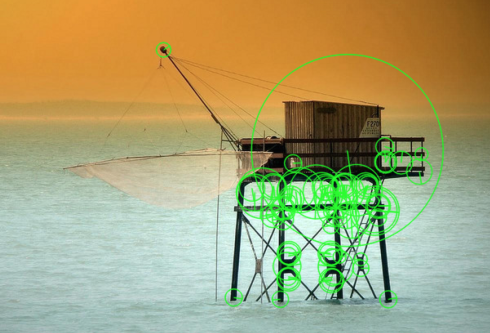

In [ ]:
import cv2
import numpy as np

input_image = cv2.imread('fishing_house.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# For version opencv < 3.0.0, use cv2.SURF()
surf = cv2.xfeatures2d.SURF_create()

# This threshold controls the number of keypoints
surf.setHessianThreshold(15000)

keypoints, descriptors = surf.detectAndCompute(gray_image, None)

cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SURF features', input_image)
cv2.waitKey()

## 7. Features from accelerated segment test (FAST)

- Mặc dù SURF nhanh hơn SIFT, nhưng nó không đủ nhanh cho một hệ thống thời gian thực (real-time system), đặc biệt là khi bị hạn chế về tài nguyên.
- Khi bạn đang xây dựng một ứng dụng thời gian thực trên thiết bị di động, bạn sẽ không cần phải sử dụng SURF để tính toán trong thời gian thực. Chúng ta cần một cái gì đó thực sự nhanh chóng và không tính toán. 
- Do đó, **Rosten** và **Drumond** đã đưa ra **FAST**. Đúng như cái tên cho thấy, nó thực sự nhanh chóng!

- Thay vì trải qua tất cả các tính toán đắt tiền, họ đã đưa ra một bài kiểm tra tốc độ cao để nhanh chóng xác định xem điểm hiện tại có phải là điểm then chốt tiềm năng hay không.
- **Chúng ta cần lưu ý rằng FAST chỉ để phát hiện điểm chính keypoint. Khi các điểm chính (keypoints) được phát hiện, chúng ta cần sử dụng SIFT hoặc SURF để tính toán các mô tả**. Hãy xem xét hình ảnh sau đây:

- Nếu chúng ta chạy **FAST keypoint detector** trên hình ảnh này, bạn sẽ nhận được output như sau:

- Nếu chúng ta loại bỏ các điểm chính không quan trọng, nó sẽ trông như thế này:

In [ ]:
import cv2
import numpy as np

input_image = cv2.imread('tool.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Version under opencv 3.0.0 cv2.FastFeatureDetector()
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(gray_image, None)
print("Number of keypoints with non max suppression:", len(keypoints))

# Draw keypoints on top of the input image
img_keypoints_with_nonmax=input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_with_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('FAST keypoints - with non max suppression',
img_keypoints_with_nonmax)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(False)

# Detect keypoints again
keypoints = fast.detect(gray_image, None)
print("Total Keypoints without nonmaxSuppression:", len(keypoints))

# Draw keypoints on top of the input image
img_keypoints_without_nonmax=input_image.copy()
cv2.drawKeypoints(input_image, keypoints, img_keypoints_without_nonmax, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('FAST keypoints - without non max suppression', img_keypoints_without_nonmax)
cv2.waitKey()

## 8. Binary robust independent elementary features (BRIEF)

- Mặc dù chúng ta có FAST để nhanh chóng phát hiện các điểm chính, chúng ta vẫn phải sử dụng SIFT hoặc SURF để tính toán các mô tả. Chúng ta cần một cách để nhanh chóng tính toán các mô tả.
- BRIEF là một phương pháp để trích xuất các đặc trưng mô tả. Nó không thể tự phát hiện các điểm chính, vì vậy chúng ta cần sử dụng kết hợp với point detector. Điểm hay của BRIEF là nó nhỏ gọn và nhanh chóng.

- Hãy xem xét hình ảnh sau:

- **BRIEF** lấy danh sách các điểm chính đầu vào và đưa ra danh sách cập nhật (output). Vì vậy, nếu bạn chạy BRIEF trên hình ảnh này, bạn sẽ thấy một cái gì đó như thế này:

- Dưới đây là code để đạt được điều bên trên:

In [ ]:
import cv2
import numpy as np

input_image = cv2.imread('house.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Initiate FAST detector
fast = cv2.FastFeatureDetector_create()

# Initiate BRIEF extractor, before opencv 3.0.0 use cv2.DescriptorExtractor_create("BRIEF")
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
keypoints = fast.detect(gray_image, None)

# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray_image, keypoints)
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0))
cv2.imshow('BRIEF keypoints', input_image)
cv2.waitKey()

## 9. Oriented FAST and Rotated BRIEF (ORB)

- Vì vậy, bây giờ chúng ta đã đi đến sự kết hợp tốt nhất trong số tất cả các kết hợp mà chúng ta đã thảo luận cho đến hiện tại.
- Thuật toán này không được tạo ra trong OpenCV Labs. **It's fast, robust, and open!**. Các thuật toán SIFT và SURF đều được cấp bằng sáng chế và bạn không thể sử dụng chúng cho mục đích thương mại; đây là lý do tại sao ORB tốt theo nhiều chiều.

- Nếu bạn chạy ORB keypoint detector trên một trong những hình ảnh được hiển thị trước đó, bạn sẽ thấy output như sau:

In [ ]:
import cv2
import numpy as np

input_image = cv2.imread('fishing_house.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Initiate ORB object, before opencv 3.0.0 use cv2.ORB()
orb = cv2.ORB_create()

# find the keypoints with ORB
keypoints = orb.detect(gray_image, None)

# find the keypoints with ORB
keypoints = orb.detect(gray_image, None)

# draw only the location of the keypoints without size or orientation
cv2.drawKeypoints(input_image, keypoints, input_image, color=(0,255,0))

cv2.imshow('ORB keypoints', input_image)
cv2.waitKey()

## Kết luận

- Trong chương này, chúng ta đã tìm hiểu về **tầm quan trọng của các điểm chính (the importance of keypoints)** và lý do tại sao chúng tôi cần chúng. Chúng tôi đã thảo luận về các thuật toán khác nhau để phát hiện các điểm chính và mô tả đặc trưng được tính toán. 
- Chúng ta sẽ sử dụng các thuật toán này trong tất cả các chương tiếp theo trong các ngữ cảnh khác nhau. Khái niệm về các **điểm chính (keypoint)** là mấu chốt của computer vision và đóng vai trò quan trọng trong nhiều hệ thống hiện đại.
- **Trong chương tiếp theo, chúng ta sẽ thảo luận về cách ghép nhiều hình ảnh của cùng một cảnh với nhau để tạo ra một hình ảnh toàn cảnh.**